In [8]:
from urllib.request import Request, urlopen
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url = 'https://www.gambitresearch.com/quiz/'
req = Request(url) 
html = urlopen(req).read().decode('utf-8', 'ignore')
print(html)


		<HTML>
		<HEAD>
		<TITLE> Gambit Research Job Application Page </TITLE>
		<script type="text/javascript">
		function scramble(ascii,a,b,c) {
			for(i=0; i<ascii.length; i++) {
				if (i%3==0) {ascii[i]=(ascii[i]+a)%256;}
				if (i%3==1) {ascii[i]=(ascii[i]+b)%256;}
				if (i%3==2) {ascii[i]=(ascii[i]+c)%256;}
			}
			return ascii;
		}
		</script>
		</HEAD>
		<BODY>
		The cipher below contains instructions on how to apply for a job<BR><BR>
		46 234 150 82 244 86 6 200 153 84 236 156 71 249 159 82 230 158 79 244 152 89 165 144 85 247 74 89 244 150 92 238 152 77 165 158 78 234 74 45 230 151 72 238 158 6 232 146 71 241 150 75 243 145 75 179 74 54 241 143 71 248 143 6 248 143 84 233 74 95 244 159 88 165 157 85 241 159 90 238 153 84 165 139 84 233 74 41 219 74 90 244 74 79 232 139 84 232 153 74 234 106 77 230 151 72 238 158 88 234 157 75 230 156 73 237 88 73 244 151 6 246 159 85 249 147 84 236 74 88 234 144 75 247 143 84 232 143 32 165 93 30 190 143 24 183 96 74 181 97 20
		</BODY>
		</HT

The javascript function in the page source appears to take ascii characters and shift them mod 256 by three constants a, b and c. The constants seem to be random as the characters are random with each page load, but I need only one set of a, b and c to decipher the message. I start by saving the numbers to an array as well as an array for each of set of chars shifted by a (nums_0), b (nums_1) and c.

In [9]:
nums_str = html[445:-17].strip() # just the numbers
nums_list = nums_str.split(' ')
nums = np.ndarray(len(nums_list))

# print(len(nums_list)) # 151
nums_0 = np.ndarray(51)
nums_1 = np.ndarray(50)
nums_2 = np.ndarray(50)
for i in range(len(nums_list)):
    nums[i] = int(nums_list[i])
    if i % 3 == 0:
        nums_0[int(i/3)] = int(nums_list[i])
    elif i % 3 == 1:
        nums_1[int(i/3)] = int(nums_list[i])
    elif i % 3 == 2:
        nums_2[int(i/3)] = int(nums_list[i])

look at a histogram for each set of chars to determine how much they should be shifted to return to original ascii. a histogram of a human-readable ascii message would lie mostly between 97-122, lower case a-z.

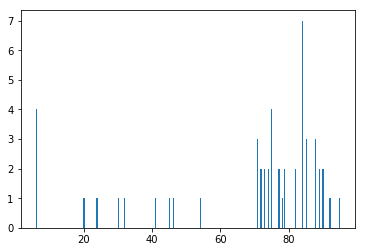

In [10]:
plt.hist(nums_0, bins=256)
plt.show()

looks like most values between 70 and 96, whereas lower case ascii lies from 97-122. so we should try shifting the numbers forward around 97-70=27. repeat this process for the other two histograms.

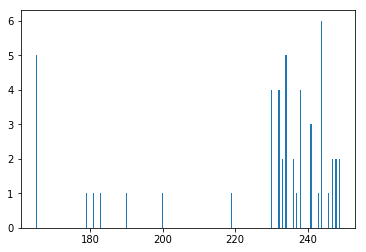

In [12]:
plt.hist(nums_1, bins=256)
plt.show()

In [20]:
229-97

132

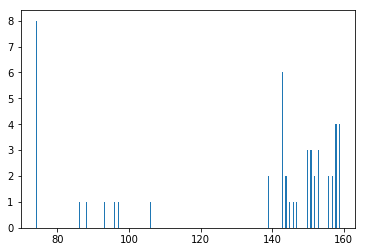

In [14]:
plt.hist(nums_2, bins=256)
plt.show()

In [27]:
139-97

42

now we can put the string back together, shifted back to the original ascii chars. some trial and error is necessary and looking at an ascii chart helps.

In [26]:
shift_0 = -26
shift_1 = 133
shift_2 = 42

msg = ''
for i in range(50): 
    msg = msg + chr(int(nums_0[i] - shift_0) % 256)
    msg = msg + chr(int(nums_1[i] - shift_1) % 256)
    msg = msg + chr(int(nums_2[i] - shift_2) % 256)
msg = msg + chr(int(nums_0[50] - shift_0) % 256)
    
print(msg)

Hello, Congratulations for solving the Gambit challenge. Please send your solution and CV to icancode@gambitresearch.com quoting reference: 389e226d07.
